In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import seaborn as sb
import os
import warnings

pd.set_option('display.max_columns',500)
warnings.filterwarnings(action='ignore')



In [2]:
#importing dataset
dataset = pd.read_csv('hotel.csv')

In [3]:
len(data)

NameError: name 'data' is not defined

In [ ]:
dataset.info()

In [38]:
dataset.columns

Index(['hotel', 'is_canceled', 'lead_time', 'arrival_date_year',
       'arrival_date_month', 'arrival_date_week_number',
       'arrival_date_day_of_month', 'stays_in_weekend_nights',
       'stays_in_week_nights', 'adults', 'children', 'babies', 'meal',
       'country', 'market_segment', 'distribution_channel',
       'is_repeated_guest', 'previous_cancellations',
       'previous_bookings_not_canceled', 'reserved_room_type',
       'assigned_room_type', 'booking_changes', 'deposit_type', 'agent',
       'company', 'days_in_waiting_list', 'customer_type', 'adr',
       'required_car_parking_spaces', 'total_of_special_requests',
       'reservation_status', 'reservation_status_date'],
      dtype='object')

In [4]:
dataset.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,meal,country,market_segment,distribution_channel,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,reserved_room_type,assigned_room_type,booking_changes,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,0.0,0,BB,PRT,Direct,Direct,0,0,0,C,C,3,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,0.0,0,BB,PRT,Direct,Direct,0,0,0,C,C,4,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,0.0,0,BB,GBR,Direct,Direct,0,0,0,A,C,0,No Deposit,NaN,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,0.0,0,BB,GBR,Corporate,Corporate,0,0,0,A,A,0,No Deposit,304.0,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,0.0,0,BB,GBR,Online TA,TA/TO,0,0,0,A,A,0,No Deposit,240.0,NaN,0,Transient,98.0,0,1,Check-Out,2015-07-03


In [5]:
dataset.isnull().sum()/len(dataset)*100

hotel                              0.000000
is_canceled                        0.000000
lead_time                          0.000000
arrival_date_year                  0.000000
arrival_date_month                 0.000000
arrival_date_week_number           0.000000
arrival_date_day_of_month          0.000000
stays_in_weekend_nights            0.000000
stays_in_week_nights               0.000000
adults                             0.000000
children                           0.003350
babies                             0.000000
meal                               0.000000
country                            0.408744
market_segment                     0.000000
distribution_channel               0.000000
is_repeated_guest                  0.000000
previous_cancellations             0.000000
previous_bookings_not_canceled     0.000000
reserved_room_type                 0.000000
assigned_room_type                 0.000000
booking_changes                    0.000000
deposit_type                    

In [33]:
dataset["country"].unique()

array(['PRT', 'GBR', 'USA', 'ESP', 'IRL', 'FRA', nan, 'ROU', 'NOR', 'OMN',
       'ARG', 'POL', 'DEU', 'BEL', 'CHE', 'CN', 'GRC', 'ITA', 'NLD',
       'DNK', 'RUS', 'SWE', 'AUS', 'EST', 'CZE', 'BRA', 'FIN', 'MOZ',
       'BWA', 'LUX', 'SVN', 'ALB', 'IND', 'CHN', 'MEX', 'MAR', 'UKR',
       'SMR', 'LVA', 'PRI', 'SRB', 'CHL', 'AUT', 'BLR', 'LTU', 'TUR',
       'ZAF', 'AGO', 'ISR', 'CYM', 'ZMB', 'CPV', 'ZWE', 'DZA', 'KOR',
       'CRI', 'HUN', 'ARE', 'TUN', 'JAM', 'HRV', 'HKG', 'IRN', 'GEO',
       'AND', 'GIB', 'URY', 'JEY', 'CAF', 'CYP', 'COL', 'GGY', 'KWT',
       'NGA', 'MDV', 'VEN', 'SVK', 'FJI', 'KAZ', 'PAK', 'IDN', 'LBN',
       'PHL', 'SEN', 'SYC', 'AZE', 'BHR', 'NZL', 'THA', 'DOM', 'MKD',
       'MYS', 'ARM', 'JPN', 'LKA', 'CUB', 'CMR', 'BIH', 'MUS', 'COM',
       'SUR', 'UGA', 'BGR', 'CIV', 'JOR', 'SYR', 'SGP', 'BDI', 'SAU',
       'VNM', 'PLW', 'QAT', 'EGY', 'PER', 'MLT', 'MWI', 'ECU', 'MDG',
       'ISL', 'UZB', 'NPL', 'BHS', 'MAC', 'TGO', 'TWN', 'DJI', 'STP',
       'KNA', 'E

In [34]:
dataset["country"].values_counts()

AttributeError: 'Series' object has no attribute 'values_counts'

In [7]:
dataset['children'].value_counts()

children
0.0     110796
1.0       4861
2.0       3652
3.0         76
10.0         1
Name: count, dtype: int64

In [9]:
dataset['children'].fillna(0,inplace=True)

In [12]:
perc_country_dataset = pd.DataFrame([dataset['country'].value_counts(),dataset['country'].value_counts()*100/dataset.shape[0]]).T
perc_country_dataset.columns = ['Count', '% Distribution']
perc_country_dataset

,Count,% Distribution
country,,
PRT,48590.0,40.698551
GBR,12129.0,10.159142
FRA,10415.0,8.723511
ESP,8568.0,7.176480
DEU,7287.0,6.103526
...,...,...
DJI,1.0,0.000838
BWA,1.0,0.000838
HND,1.0,0.000838


In [13]:
dataset['country'].fillna('PRT',inplace=True)

In [30]:
len(dataset.columns)

32

<Figure size 1500x200 with 0 Axes>

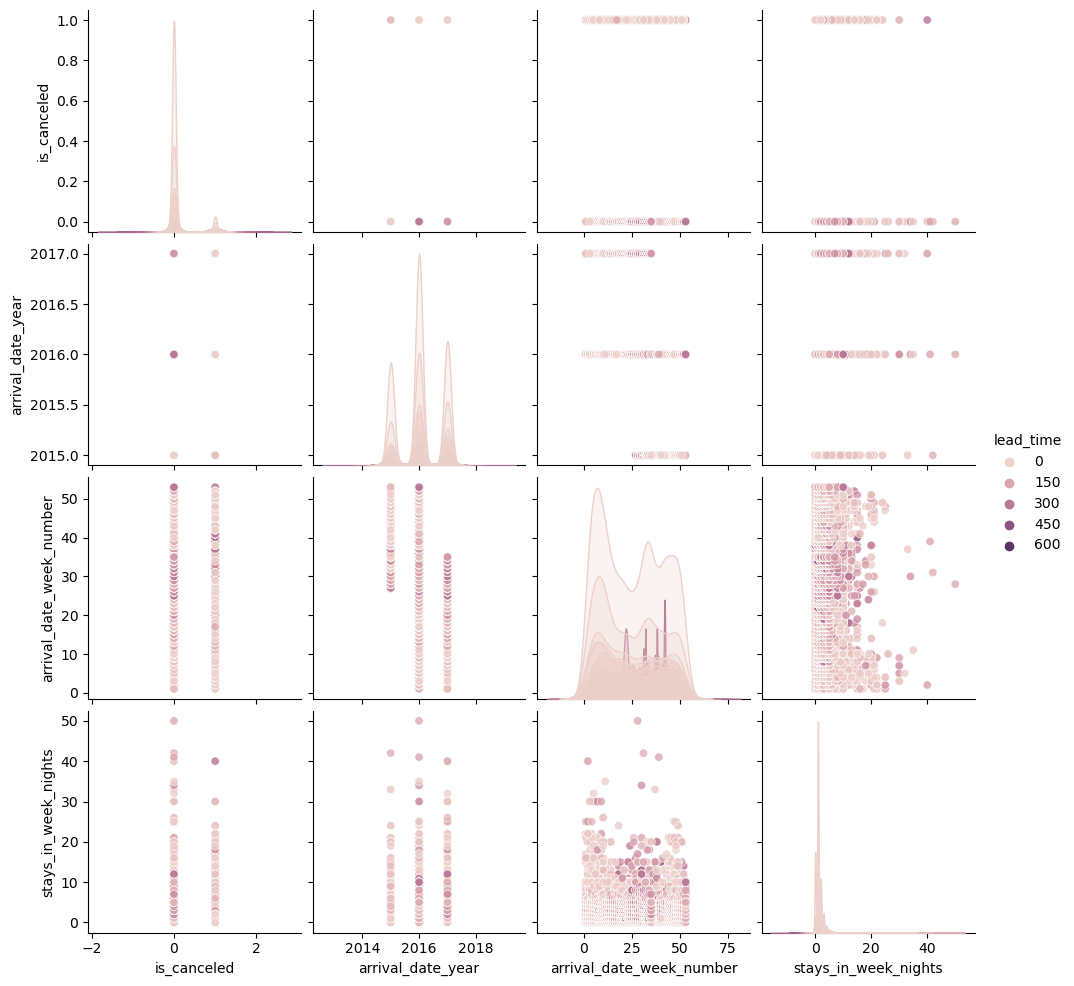

In [35]:
plt.figure(figsize=(15,2))
sns.pairplot(dataset[['hotel','is_canceled','lead_time','arrival_date_year','arrival_date_month','arrival_date_week_number','stays_in_week_nights']],
             hue='lead_time',plot_kws={'alpha':0.8})
plt.show()



<Figure size 1500x200 with 0 Axes>

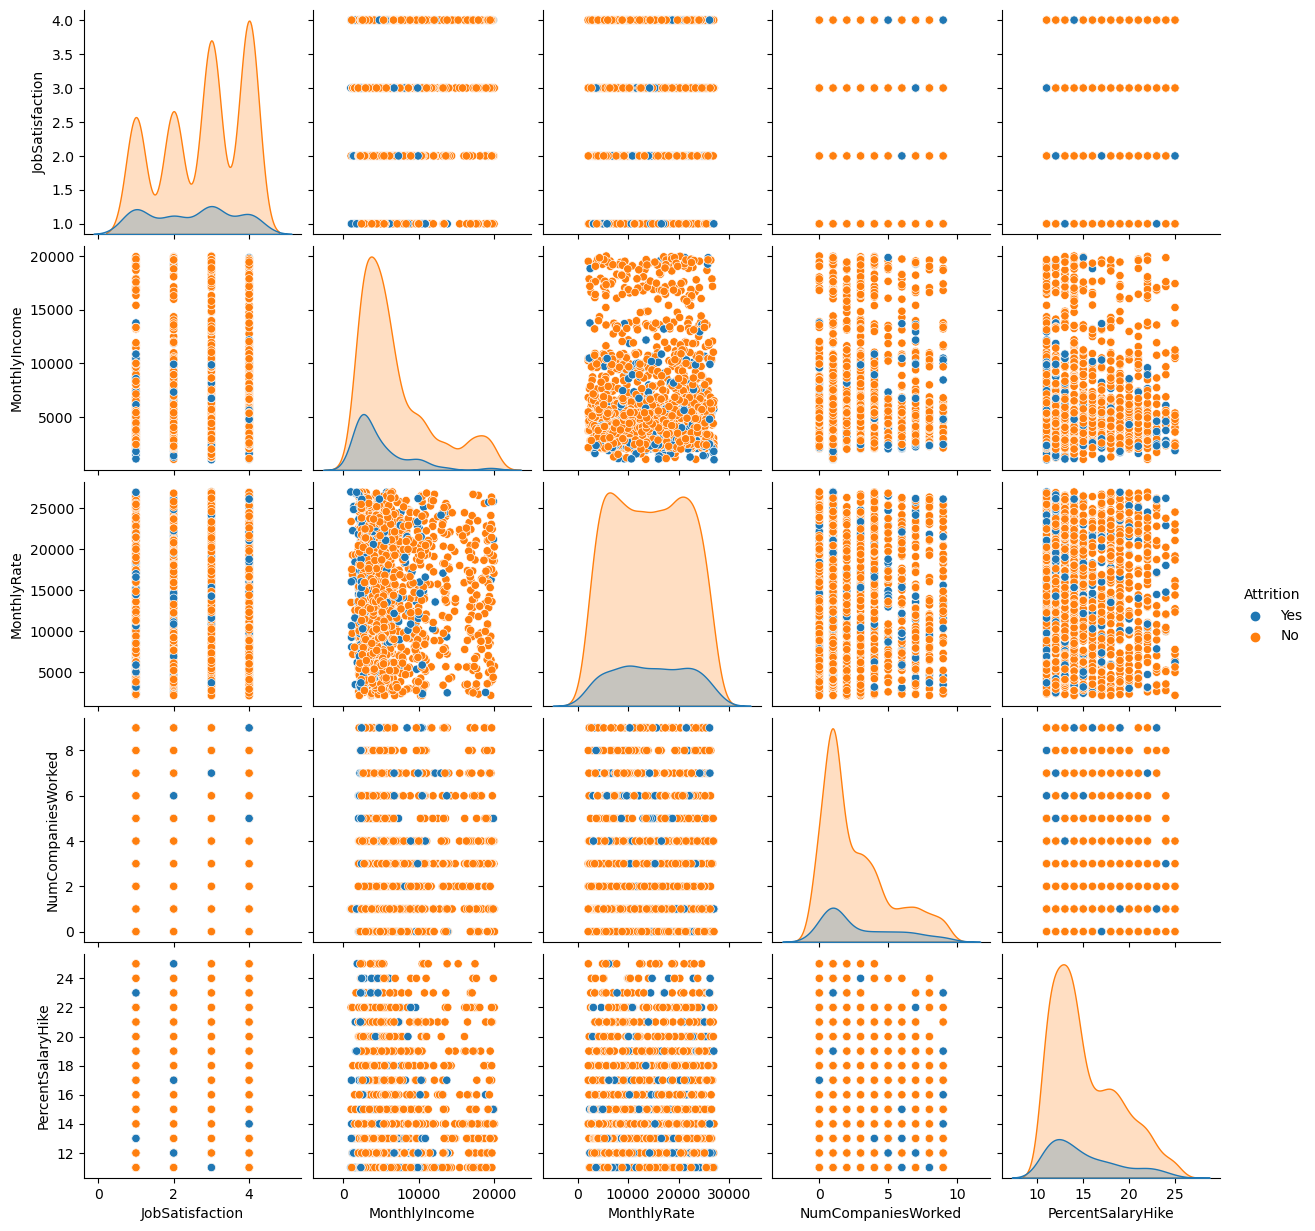

In [27]:
plt.figure(figsize=(15,2))
sns.pairplot(data[['JobSatisfaction','MonthlyIncome', 'MonthlyRate','NumCompaniesWorked','PercentSalaryHike','Attrition']],
             hue='Attrition')
plt.show()
             

In [36]:
dataset["deposit_type"].unique()

array(['No Deposit', 'Refundable', 'Non Refund'], dtype=object)

In [37]:
dataset.drop(columns="company", inplace=True)

In [38]:
null_colomns=dataset.columns[dataset.isnull().any()]

In [39]:
null_colomns

Index(['children', 'country', 'agent'], dtype='object')

In [40]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119390 entries, 0 to 119389
Data columns (total 31 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   hotel                           119390 non-null  object 
 1   is_canceled                     119390 non-null  int64  
 2   lead_time                       119390 non-null  int64  
 3   arrival_date_year               119390 non-null  int64  
 4   arrival_date_month              119390 non-null  object 
 5   arrival_date_week_number        119390 non-null  int64  
 6   arrival_date_day_of_month       119390 non-null  int64  
 7   stays_in_weekend_nights         119390 non-null  int64  
 8   stays_in_week_nights            119390 non-null  int64  
 9   adults                          119390 non-null  int64  
 10  children                        119386 non-null  float64
 11  babies                          119390 non-null  int64  
 12  meal            

In [41]:
dataset_numeric = dataset.select_dtypes(include=['number'])

In [42]:
numeric_corr = dataset_numeric.corr()

<Axes: >

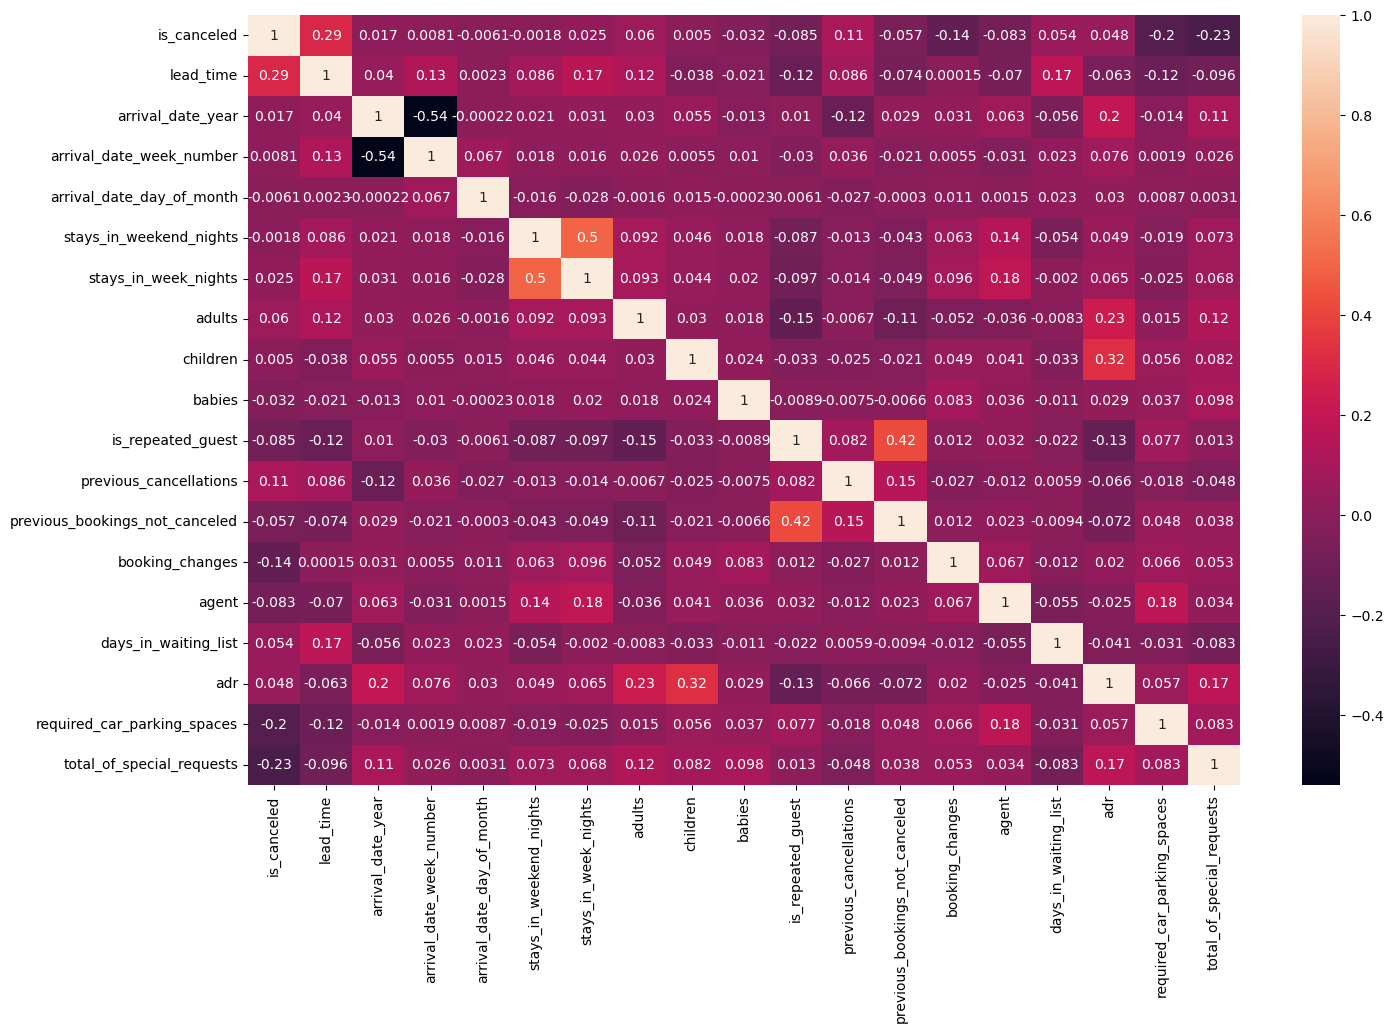

In [45]:
plt.figure(figsize=(16,10))
sb.heatmap(numeric_corr, annot=True)

In [46]:
dataset_cat = dataset.select_dtypes(include = "object")

In [47]:
dataset_cat

,hotel,arrival_date_month,meal,country,market_segment,distribution_channel,reserved_room_type,assigned_room_type,deposit_type,customer_type,reservation_status,reservation_status_date
0,Resort Hotel,July,BB,PRT,Direct,Direct,C,C,No Deposit,Transient,Check-Out,2015-07-01
1,Resort Hotel,July,BB,PRT,Direct,Direct,C,C,No Deposit,Transient,Check-Out,2015-07-01
2,Resort Hotel,July,BB,GBR,Direct,Direct,A,C,No Deposit,Transient,Check-Out,2015-07-02
3,Resort Hotel,July,BB,GBR,Corporate,Corporate,A,A,No Deposit,Transient,Check-Out,2015-07-02
4,Resort Hotel,July,BB,GBR,Online TA,TA/TO,A,A,No Deposit,Transient,Check-Out,2015-07-03
...,...,...,...,...,...,...,...,...,...,...,...,...
119385,City Hotel,August,BB,BEL,Offline TA/TO,TA/TO,A,A,No Deposit,Transient,Check-Out,2017-09-06
119386,City Hotel,August,BB,FRA,Online TA,TA/TO,E,E,No Deposit,Transient,Check-Out,2017-09-07
119387,City Hotel,August,BB,DEU,Online TA,TA/TO,D,D,No Deposit,Transient,Check-Out,2017-09-07
119388,City Hotel,August,BB,GBR,Online TA,TA/TO,A,A,No Deposit,Transient,Check-Out,2017-09-07


In [48]:
dataset["arrival_date_month"].unique()

array(['July', 'August', 'September', 'October', 'November', 'December',
       'January', 'February', 'March', 'April', 'May', 'June'],
      dtype=object)

In [49]:
dataset_numeric

,is_canceled,lead_time,arrival_date_year,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,booking_changes,agent,days_in_waiting_list,adr,required_car_parking_spaces,total_of_special_requests
0,0,342,2015,27,1,0,0,2,0.0,0,0,0,0,3,NaN,0,0.00,0,0
1,0,737,2015,27,1,0,0,2,0.0,0,0,0,0,4,NaN,0,0.00,0,0
2,0,7,2015,27,1,0,1,1,0.0,0,0,0,0,0,NaN,0,75.00,0,0
3,0,13,2015,27,1,0,1,1,0.0,0,0,0,0,0,304.0,0,75.00,0,0
4,0,14,2015,27,1,0,2,2,0.0,0,0,0,0,0,240.0,0,98.00,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
119385,0,23,2017,35,30,2,5,2,0.0,0,0,0,0,0,394.0,0,96.14,0,0
119386,0,102,2017,35,31,2,5,3,0.0,0,0,0,0,0,9.0,0,225.43,0,2
119387,0,34,2017,35,31,2,5,2,0.0,0,0,0,0,0,9.0,0,157.71,0,4
119388,0,109,2017,35,31,2,5,2,0.0,0,0,0,0,0,89.0,0,104.40,0,0


In [50]:
for columns in dataset_cat:
    unique_values = dataset[columns].unique()
    print(f"unique values in{columns}:", unique_values)

unique values inhotel: ['Resort Hotel' 'City Hotel']
unique values inarrival_date_month: ['July' 'August' 'September' 'October' 'November' 'December' 'January'
 'February' 'March' 'April' 'May' 'June']
unique values inmeal: ['BB' 'FB' 'HB' 'SC' 'Undefined']
unique values incountry: ['PRT' 'GBR' 'USA' 'ESP' 'IRL' 'FRA' nan 'ROU' 'NOR' 'OMN' 'ARG' 'POL'
 'DEU' 'BEL' 'CHE' 'CN' 'GRC' 'ITA' 'NLD' 'DNK' 'RUS' 'SWE' 'AUS' 'EST'
 'CZE' 'BRA' 'FIN' 'MOZ' 'BWA' 'LUX' 'SVN' 'ALB' 'IND' 'CHN' 'MEX' 'MAR'
 'UKR' 'SMR' 'LVA' 'PRI' 'SRB' 'CHL' 'AUT' 'BLR' 'LTU' 'TUR' 'ZAF' 'AGO'
 'ISR' 'CYM' 'ZMB' 'CPV' 'ZWE' 'DZA' 'KOR' 'CRI' 'HUN' 'ARE' 'TUN' 'JAM'
 'HRV' 'HKG' 'IRN' 'GEO' 'AND' 'GIB' 'URY' 'JEY' 'CAF' 'CYP' 'COL' 'GGY'
 'KWT' 'NGA' 'MDV' 'VEN' 'SVK' 'FJI' 'KAZ' 'PAK' 'IDN' 'LBN' 'PHL' 'SEN'
 'SYC' 'AZE' 'BHR' 'NZL' 'THA' 'DOM' 'MKD' 'MYS' 'ARM' 'JPN' 'LKA' 'CUB'
 'CMR' 'BIH' 'MUS' 'COM' 'SUR' 'UGA' 'BGR' 'CIV' 'JOR' 'SYR' 'SGP' 'BDI'
 'SAU' 'VNM' 'PLW' 'QAT' 'EGY' 'PER' 'MLT' 'MWI' 'ECU' 'MDG' 'I

In [51]:
dataset_catagories = dataset_cat.drop(columns = "reservation_status_date")

In [52]:
dataset_catagories

,hotel,arrival_date_month,meal,country,market_segment,distribution_channel,reserved_room_type,assigned_room_type,deposit_type,customer_type,reservation_status
0,Resort Hotel,July,BB,PRT,Direct,Direct,C,C,No Deposit,Transient,Check-Out
1,Resort Hotel,July,BB,PRT,Direct,Direct,C,C,No Deposit,Transient,Check-Out
2,Resort Hotel,July,BB,GBR,Direct,Direct,A,C,No Deposit,Transient,Check-Out
3,Resort Hotel,July,BB,GBR,Corporate,Corporate,A,A,No Deposit,Transient,Check-Out
4,Resort Hotel,July,BB,GBR,Online TA,TA/TO,A,A,No Deposit,Transient,Check-Out
...,...,...,...,...,...,...,...,...,...,...,...
119385,City Hotel,August,BB,BEL,Offline TA/TO,TA/TO,A,A,No Deposit,Transient,Check-Out
119386,City Hotel,August,BB,FRA,Online TA,TA/TO,E,E,No Deposit,Transient,Check-Out
119387,City Hotel,August,BB,DEU,Online TA,TA/TO,D,D,No Deposit,Transient,Check-Out
119388,City Hotel,August,BB,GBR,Online TA,TA/TO,A,A,No Deposit,Transient,Check-Out


In [53]:
from sklearn.preprocessing import LabelEncoder

In [54]:
label_encoder = LabelEncoder()

In [55]:
dataset_catagories["hotel"] = label_encoder.fit_transform(dataset_catagories["hotel"])

# plt.figure(figsize=(15,2))
sns.countplot(data=data, x ='BusinessTravel',hue='Attrition')
plt.show()

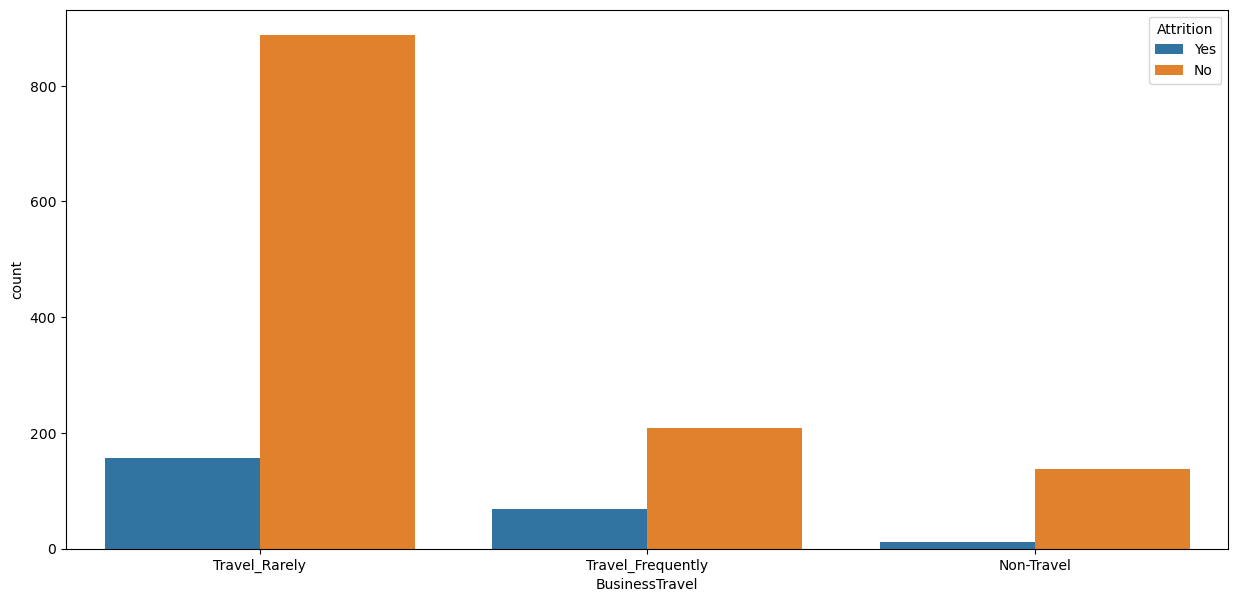

In [29]:
plt.figure(figsize=(15,7))
sns.countplot(data=data, x ='BusinessTravel',hue='Attrition')
plt.show()
             

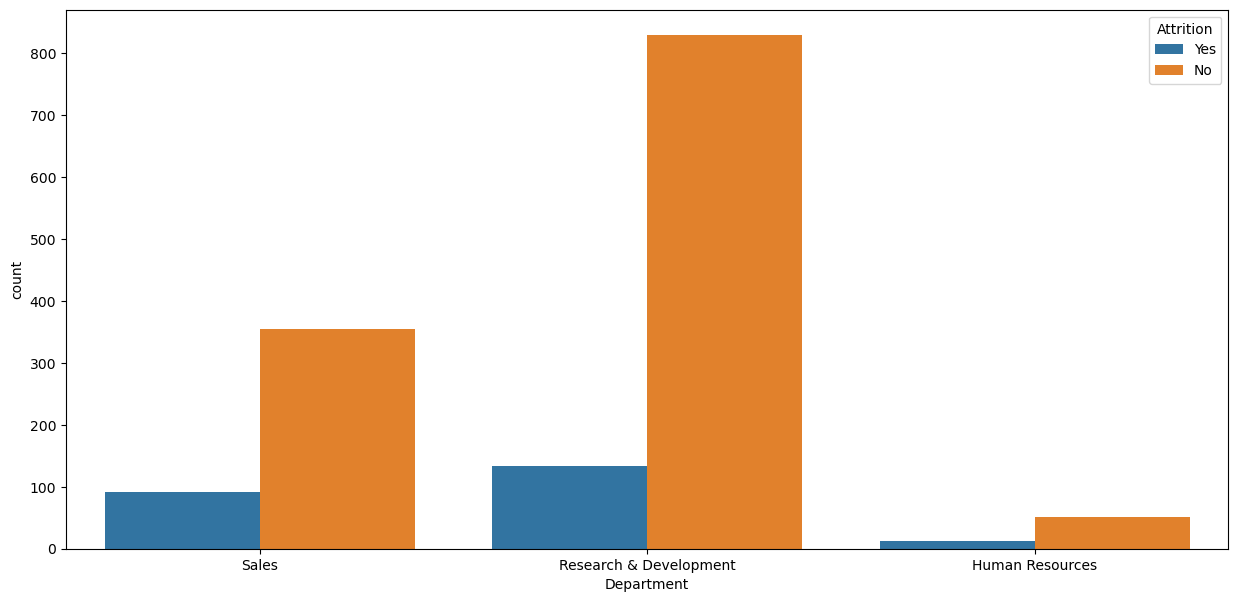

In [30]:
plt.figure(figsize=(15,7))
sns.countplot(data=data, x ='Department',hue='Attrition')
plt.show()

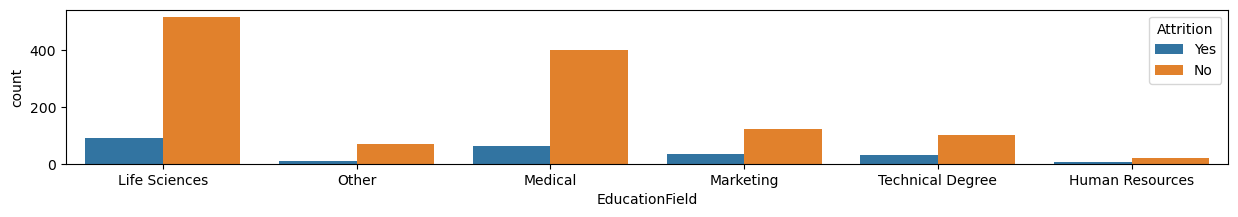

In [32]:
plt.figure(figsize=(15,2))
sns.countplot(data=data, x ='EducationField',hue='Attrition')
plt.show()

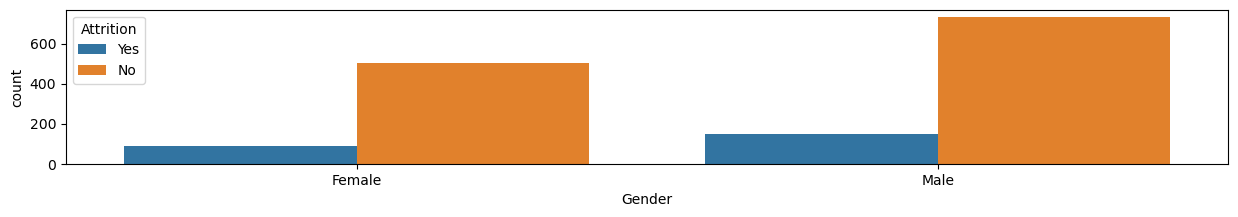

In [33]:
plt.figure(figsize=(15,2))
sns.countplot(data=data, x ='Gender',hue='Attrition')
plt.show()

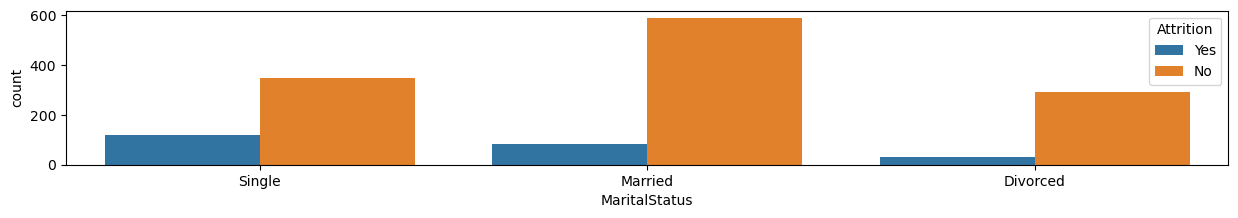

In [34]:
plt.figure(figsize=(15,2))
sns.countplot(data=data, x ='MaritalStatus',hue='Attrition')
plt.show()

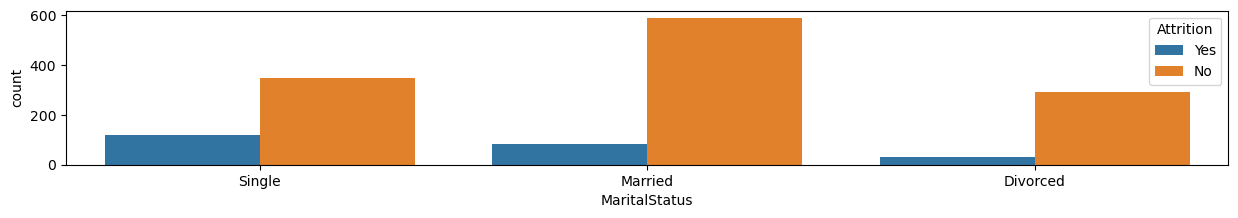

In [35]:
plt.figure(figsize=(15,2))
sns.countplot(data=data, x ='MaritalStatus',hue='Attrition')
plt.show()

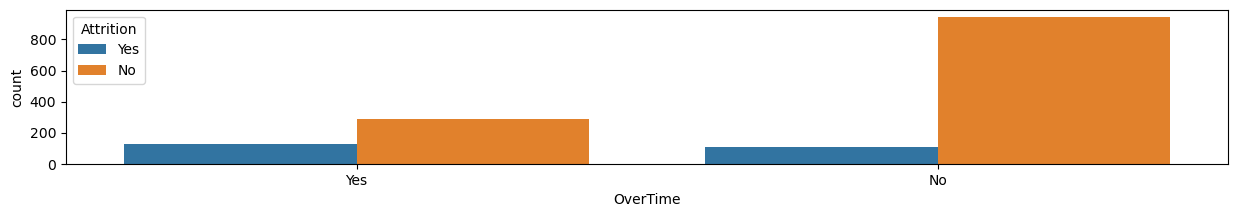

In [36]:
plt.figure(figsize=(15,2))
sns.countplot(data=data, x ='OverTime',hue='Attrition')
plt.show()

In [37]:
data.isnull().sum()/len(data)*100

Age                        0.0
Attrition                  0.0
BusinessTravel             0.0
DailyRate                  0.0
Department                 0.0
DistanceFromHome           0.0
EducationField             0.0
EnvironmentSatisfaction    0.0
Gender                     0.0
HourlyRate                 0.0
JobRole                    0.0
JobSatisfaction            0.0
MaritalStatus              0.0
MonthlyIncome              0.0
MonthlyRate                0.0
NumCompaniesWorked         0.0
OverTime                   0.0
PercentSalaryHike          0.0
PerformanceRating          0.0
StandardHours              0.0
TotalWorkingYears          0.0
TrainingTimesLastYear      0.0
WorkLifeBalance            0.0
YearsAtCompany             0.0
YearsInCurrentRole         0.0
YearsSinceLastPromotion    0.0
YearsWithCurrManager       0.0
dtype: float64

In [37]:
from sklearn.preprocessing import StandardScaler
def data_type(data):
    """
    function to identify numerical or categorical data columns
    :param data: Dataframe
    :return: list of numerical or categorical columns
    """
    numerical = []
    categorical = []
    for i in dataset.columns:
        if dataset[i].dtype == 'int64' or dataset[i].dtype == 'float64':
            numerical.append(i)
        else:
            categorical.append(i)
    return numerical, categorical

numerical, categorical = data_type(data) 
        
    
   



In [38]:
def binary_columns(df):
    """
    Generates a list of binary columns in dataframe.
    """
    binary_cols = []
    for col in df.select_dtypes(include=['int', 'float']).columns:
        unique_values = df[col].unique()
        if np.in1d(unique_values,[0, 1]).all:
            binary_cols.append(col)
    return binary_cols

binary_cols = binary_columns(data)
numerical = [i for i in numerical if i not in binary_cols]


In [39]:
data

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,EducationField,EnvironmentSatisfaction,Gender,HourlyRate,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,MonthlyRate,NumCompaniesWorked,OverTime,PercentSalaryHike,PerformanceRating,StandardHours,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,Life Sciences,2,Female,94,Sales Executive,4,Single,5993,19479,8,Yes,11,3,80,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,Life Sciences,3,Male,61,Research Scientist,2,Married,5130,24907,1,No,23,4,80,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,Other,4,Male,92,Laboratory Technician,3,Single,2090,2396,6,Yes,15,3,80,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,Life Sciences,4,Female,56,Research Scientist,3,Married,2909,23159,1,Yes,11,3,80,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,Medical,1,Male,40,Laboratory Technician,2,Married,3468,16632,9,No,12,3,80,6,3,3,2,2,2,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1465,36,No,Travel_Frequently,884,Research & Development,23,Medical,3,Male,41,Laboratory Technician,4,Married,2571,12290,4,No,17,3,80,17,3,3,5,2,0,3
1466,39,No,Travel_Rarely,613,Research & Development,6,Medical,4,Male,42,Healthcare Representative,1,Married,9991,21457,4,No,15,3,80,9,5,3,7,7,1,7
1467,27,No,Travel_Rarely,155,Research & Development,4,Life Sciences,2,Male,87,Manufacturing Director,2,Married,6142,5174,1,Yes,20,4,80,6,0,3,6,2,0,3
1468,49,No,Travel_Frequently,1023,Sales,2,Medical,4,Male,63,Sales Executive,2,Married,5390,13243,2,No,14,3,80,17,3,2,9,6,0,8


In [40]:
def encoding(data, categorical):
    """
    Function to automate the process of encoding the categorical data
    :param dataset: Dataframe
    :param categorical: List of categorical columns
    :return: Dataframe
    """
    for i in categorical:
        data[i] = data[i].astype('category')
        data[i] = data[i].cat.codes
    return data

dataset = encoding(data, categorical)


In [41]:
data

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,EducationField,EnvironmentSatisfaction,Gender,HourlyRate,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,MonthlyRate,NumCompaniesWorked,OverTime,PercentSalaryHike,PerformanceRating,StandardHours,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,1,2,1102,2,1,1,2,0,94,7,4,2,5993,19479,8,1,11,3,80,8,0,1,6,4,0,5
1,49,0,1,279,1,8,1,3,1,61,6,2,1,5130,24907,1,0,23,4,80,10,3,3,10,7,1,7
2,37,1,2,1373,1,2,4,4,1,92,2,3,2,2090,2396,6,1,15,3,80,7,3,3,0,0,0,0
3,33,0,1,1392,1,3,1,4,0,56,6,3,1,2909,23159,1,1,11,3,80,8,3,3,8,7,3,0
4,27,0,2,591,1,2,3,1,1,40,2,2,1,3468,16632,9,0,12,3,80,6,3,3,2,2,2,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1465,36,0,1,884,1,23,3,3,1,41,2,4,1,2571,12290,4,0,17,3,80,17,3,3,5,2,0,3
1466,39,0,2,613,1,6,3,4,1,42,0,1,1,9991,21457,4,0,15,3,80,9,5,3,7,7,1,7
1467,27,0,2,155,1,4,1,2,1,87,4,2,1,6142,5174,1,1,20,4,80,6,0,3,6,2,0,3
1468,49,0,1,1023,2,2,3,4,1,63,7,2,1,5390,13243,2,0,14,3,80,17,3,2,9,6,0,8


# splitting data into train and test

In [16]:
X = dataset.iloc[:, 1:].values
y = dataset.iloc[:, 0].values
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 0)

In [17]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

ValueError: could not convert string to float: 'July'

In [19]:
# %pip uninstall scikit-learn -y

In [20]:
%pip install scikit-learn==1.2.1

Defaulting to user installation because normal site-packages is not writeableNote: you may need to restart the kernel to use updated packages.



DEPRECATION: Loading egg at c:\programdata\anaconda3\lib\site-packages\vboxapi-1.0-py3.11.egg is deprecated. pip 23.3 will enforce this behaviour change. A possible replacement is to use pip for package installation..


# creating the model on training dataset

In [21]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

ValueError: could not convert string to float: 'July'

In [15]:
from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression(random_state = 0, max_iter=250)
classifier.fit(x_train, y_train)

# Predict
y_pred = classifier.predict(x_test)

# Computing accuracy
model_accuracy_results['LogisticRegression'] = model_accuracy(y_test, y_pred)

NameError: name 'x_train' is not defined

In [26]:
y_pred_ini = knmodel_ini.pred(x_test)

AttributeError: 'KNeighborsClassifier' object has no attribute 'pred'

In [27]:
accuracy_score(y_test,y_pred_ini)

NameError: name 'accuracy_score' is not defined

In [28]:
plot_confusion_matrix(knmodel_ini,x_test,y_test)

NameError: name 'plot_confusion_matrix' is not defined

In [29]:
plot_roc_curve(knmodel_ini,x_test,y_test)
plt.title("Plot of ROC Curve for LR Model")
plt.show()

NameError: name 'plot_roc_curve' is not defined

In [30]:
target_names= ["Negative(0)","Positive(1)"]
print(classification_report(y_test,knmodel_ini.predict(x_test),target_names=target_names))

NameError: name 'classification_report' is not defined

In [31]:
log_loss(y_test,knmodel_ini.predict(x_test))

NameError: name 'log_loss' is not defined

In [32]:
y_pred_train = knmodel_ini.predict(x_train)

NotFittedError: This KNeighborsClassifier instance is not fitted yet. Call 'fit' with appropriate arguments before using this estimator.

In [22]:
(unique, counts) = np.unique(y_train, return_counts=True)
if counts[0]  > counts[1]:
    idx = 0
else:
    idx = 1

# Applying baseline results to y_pred
if idx == 0:
    y_pred = np.zeros(y_test.shape)
else:
    y_pred = np.ones(y_test.shape)

# Computing accuracy
model_accuracy_results['Baseline'] = model_accuracy(y_test, y_pr

SyntaxError: incomplete input (706040691.py, line 14)

In [ ]:
model_accuracy_results = {}

# Function for calculating accuracy from confusion matrix
from sklearn.metrics import confusion_matrix
def model_accuracy(y_test, y_pred):
    cm = confusion_matrix(y_test, y_pred)
    accuracy = ((cm[0,0] + cm [1,1]) * 100 / len(y_test)).round(2)
    return accuracy

In [37]:
df_model_accuracies = pd.DataFrame(list(model_accuracy_results.values()), index=model_accuracy_results.keys(), columns=['Accuracy'])
df_model_accuracies

NameError: name 'Fit' is not defined